# 各类燃弧分布分析

In [1]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
res_path = '../res/'
n_clusters = 5
n_machines = 10
is_PCA = False
res_df = pd.read_csv(res_path + '2_cluster_' + str(n_clusters) +('_PCA' if is_PCA else '')+ '.csv')

In [3]:
machine_group = res_df.groupby('machine_id')

### 方式一、各类燃弧累计出现的频率分布

In [5]:
# 计算各类燃弧累计出现的频率
labels_columns = ['machine_id'] + [str(i) + str(j) for i in range(n_clusters) for j in ['', '_frequency']]
print(labels_columns)
label_occ_count_df = pd.DataFrame(columns = labels_columns)

for machine_id in [1]:#range(1, n_machines + 1):
    tmp_machine_df = machine_group.get_group(machine_id).reset_index(drop = True)
    len_operations = len(tmp_machine_df)
    for idx in tmp_machine_df.index:
        tmp_label_counts = [machine_id]
        tmp_df = tmp_machine_df[0 : idx + 1]
        for label in range(n_clusters):
            tmp_count = len(tmp_df[tmp_df['label'] == label])
            tmp_label_counts += [tmp_count, tmp_count / (idx + 1)]
        label_occ_count_df = label_occ_count_df.append(pd.DataFrame([tmp_label_counts], columns = labels_columns), ignore_index = True)

['machine_id', '0', '0_frequency', '1', '1_frequency', '2', '2_frequency', '3', '3_frequency', '4', '4_frequency']


In [6]:
label_occ_count_df.head(10)

,machine_id,0,0_frequency,1,1_frequency,2,2_frequency,3,3_frequency,4,4_frequency
0,1,1,1.000000,0,0.000000,0,0.0,0,0.000000,0,0.0
1,1,1,0.500000,0,0.000000,0,0.0,1,0.500000,0,0.0
2,1,1,0.333333,1,0.333333,0,0.0,1,0.333333,0,0.0
3,1,2,0.500000,1,0.250000,0,0.0,1,0.250000,0,0.0
4,1,2,0.400000,2,0.400000,0,0.0,1,0.200000,0,0.0
5,1,2,0.333333,2,0.333333,0,0.0,2,0.333333,0,0.0
6,1,3,0.428571,2,0.285714,0,0.0,2,0.285714,0,0.0
7,1,3,0.375000,3,0.375000,0,0.0,2,0.250000,0,0.0
8,1,3,0.333333,3,0.333333,0,0.0,3,0.333333,0,0.0
9,1,3,0.300000,3,0.300000,0,0.0,4,0.400000,0,0.0


[0.16129032258064516, 0.2682926829268293, 0.23529411764705882, 0.26229508196721313, 0.2676056338028169, 0.24691358024691357, 0.23076923076923078, 0.22772277227722773, 0.21621621621621623, 0.21487603305785125, 0.1984732824427481, 0.2127659574468085, 0.23178807947019867, 0.2236024844720497, 0.22807017543859648, 0.2265193370165746, 0.225130890052356, 0.21890547263681592, 0.21800947867298578, 0.2081447963800905, 0.21212121212121213, 0.2074688796680498, 0.21115537848605578, 0.20689655172413793, 0.2029520295202952, 0.20284697508896798, 0.21649484536082475, 0.21926910299003322, 0.22186495176848875, 0.22741433021806853, 0.229607250755287, 0.2316715542521994, 0.22792022792022792, 0.22437673130193905, 0.22641509433962265, 0.2283464566929134, 0.23273657289002558, 0.22942643391521197, 0.23357664233576642, 0.23515439429928742, 0.23665893271461716, 0.24263038548752835, 0.24168514412416853, 0.24078091106290672, 0.23991507430997877, 0.2494802494802495, 0.2484725050916497, 0.25349301397205587, 0.256360

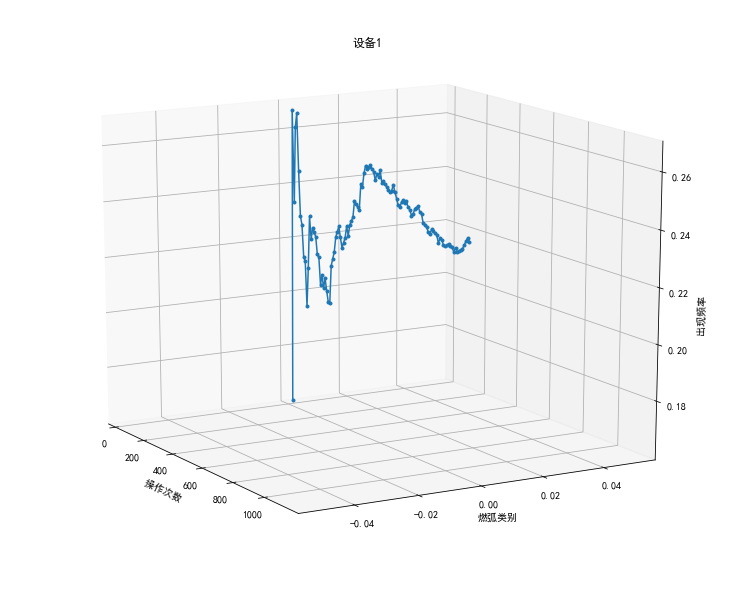

In [8]:
fig = plt.figure(figsize= (20, 40))
plt.subplots_adjust(top=1,bottom=0,left=0,right=1,hspace=0,wspace=0)
#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
for i in range(1, 11):
    ax = fig.add_subplot(5,2, i, projection='3d')

    label_frequency_columns = [str(label) + '_frequency' for label in range(n_clusters)]
    machine_df = label_occ_count_df.groupby('machine_id').get_group(i).reset_index(drop = True)
    for z in range(n_clusters):
        xs = np.arange(30, len(machine_df), 10)
        ys = machine_df.loc[xs][str(z) + '_frequency'].tolist()
        print(ys)
        ax.plot(xs, ys, zs = z, zdir='y',marker = '.')
        break
    ax.set_xlabel(u'操作次数    ')
    ax.set_ylabel(u'燃弧类别')
    ax.set_zlabel(u'出现频率    ')
    ax.set_title('设备' + str(i))
    ax.view_init(15, -30)
    break
#plt.savefig('../fig/类别数'+str(n_clusters)+'分布图1.png',dpi = 100)
plt.show()

10 [0 1 2 3 4] [0.2727272727272727, 0.36363636363636365, 0.0, 0.36363636363636365, 0.0]
60 [0 1 2 3 4] [0.26229508196721313, 0.3442622950819672, 0.03278688524590164, 0.3442622950819672, 0.01639344262295082]
110 [0 1 2 3 4] [0.21621621621621623, 0.34234234234234234, 0.036036036036036036, 0.3783783783783784, 0.02702702702702703]
160 [0 1 2 3 4] [0.2236024844720497, 0.391304347826087, 0.049689440993788817, 0.2981366459627329, 0.037267080745341616]
210 [0 1 2 3 4] [0.21800947867298578, 0.4265402843601896, 0.04739336492890995, 0.27488151658767773, 0.03317535545023697]
260 [0 1 2 3 4] [0.20689655172413793, 0.4329501915708812, 0.0421455938697318, 0.2720306513409962, 0.04597701149425287]
310 [0 1 2 3 4] [0.22186495176848875, 0.43729903536977494, 0.03858520900321544, 0.24437299035369775, 0.05787781350482315]
360 [0 1 2 3 4] [0.22437673130193905, 0.4265927977839335, 0.038781163434903045, 0.24653739612188366, 0.06371191135734072]
410 [0 1 2 3 4] [0.23357664233576642, 0.4233576642335766, 0.0389294

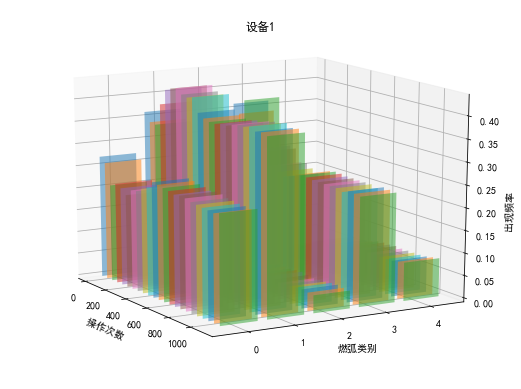

In [13]:
fig = plt.figure(figsize= (20, 40))
for i in range(1, 11):
    ax = fig.add_subplot(5,2, i, projection='3d')

    label_frequency_columns = [str(label) + '_frequency' for label in range(n_clusters)]
    machine_df = label_occ_count_df.groupby('machine_id').get_group(i).reset_index(drop = True)
    for z in range(10, len(machine_df), 50):
        xs = np.arange(n_clusters)
        ys = machine_df.loc[z][label_frequency_columns].tolist()
        print(z, xs,  ys)
        ax.bar(xs, ys, zs = z, zdir='x', alpha = 0.5)

    #ax.view_init(10, -15)
    ax.set_xlabel(u'操作次数    ')
    ax.set_ylabel(u'燃弧类别')
    ax.set_zlabel(u'出现频率    ')
    ax.set_title('设备' + str(i))
    ax.view_init(15, -30)
    break
#plt.savefig('../fig/类别数'+str(n_clusters)+'分布图2.png',dpi = 100)
plt.show()

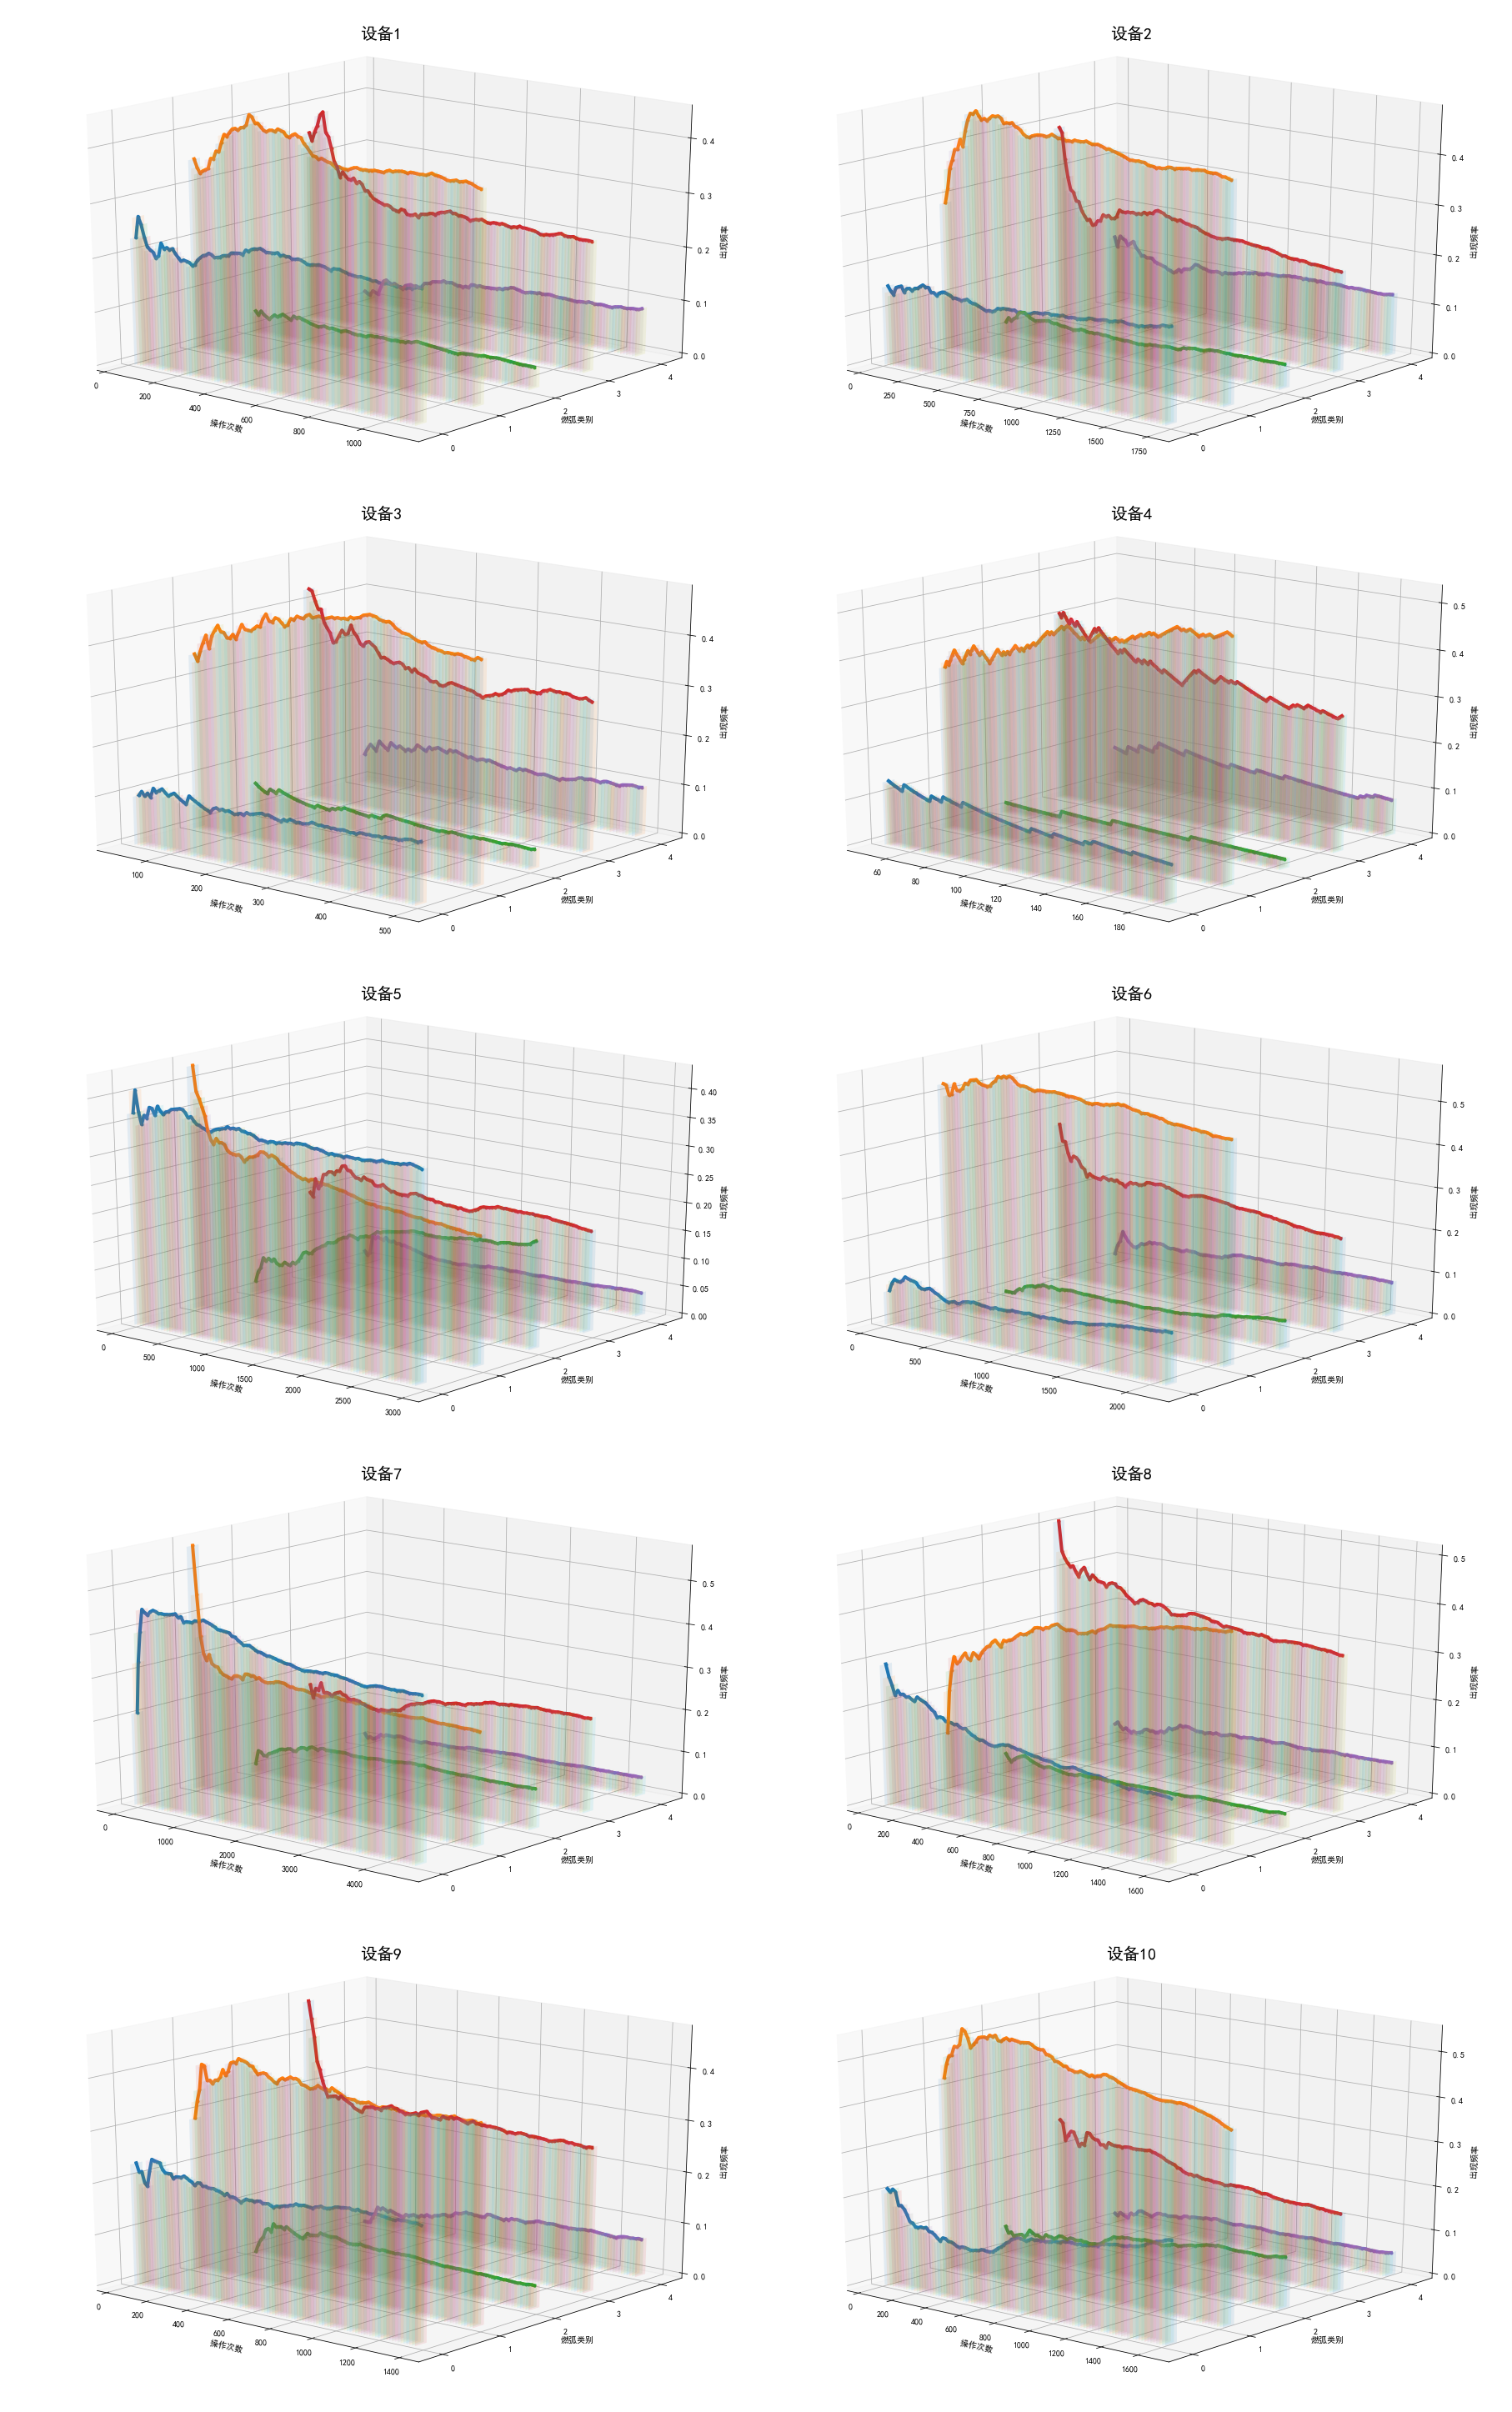

In [17]:
'''
各类燃弧累计出现的频率分布
'''
n_clusters = 5
fig = plt.figure(figsize= (25, 40))
plt.subplots_adjust(top=1,bottom=0,left=0,right=1,hspace=0,wspace=0)
#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
for i in range(1, 11):
    ax = fig.add_subplot(5,2, i, projection='3d')

    label_frequency_columns = [str(label) + '_frequency' for label in range(n_clusters)]
    machine_df = label_occ_count_df.groupby('machine_id').get_group(i).reset_index(drop = True)
    machine_range = np.arange(50, len(machine_df), int(len(machine_df)/100))
    #绘制柱状图
    for z in machine_range:
        xs = np.arange(n_clusters)
        ys = machine_df.loc[z][label_frequency_columns].tolist()
        ax.bar(xs, ys, zs = z, zdir='x', alpha = 0.1, linewidth = 0, width = 0.2)

    ax.view_init(20, -50)#(10, -15)

    #绘制折线图
    for z in range(n_clusters):
        xs = machine_range
        ys = machine_df.loc[xs][str(z) + '_frequency'].tolist()
        ax.plot(xs, ys, zs = z, zdir='y',marker = '.',linewidth = 4)
    ax.set_xlabel(u'操作次数    ')
    ax.set_ylabel(u'燃弧类别')
    ax.set_yticks(np.arange(n_clusters)) #设置刻度
    ax.set_zlabel(u'出现频率    ')
    ax.set_title('设备' + str(i), fontsize=20)
plt.savefig('../fig/类别数'+str(n_clusters)+'分布图.png',dpi = 100)
plt.show()

In [18]:
label_occ_count_df.head()

,machine_id,0,0_frequency,1,1_frequency,2,2_frequency,3,3_frequency,4,4_frequency
0,1,1,1.000000,0,0.000000,0,0.0,0,0.000000,0,0.0
1,1,1,0.500000,0,0.000000,0,0.0,1,0.500000,0,0.0
2,1,1,0.333333,1,0.333333,0,0.0,1,0.333333,0,0.0
3,1,2,0.500000,1,0.250000,0,0.0,1,0.250000,0,0.0
4,1,2,0.400000,2,0.400000,0,0.0,1,0.200000,0,0.0


### 根据燃弧分布对设备进行聚类操作

In [11]:
label_frequency_columns = [str(label) + '_frequency' for label in range(n_clusters)]
#label_frequency_columns = [str(label) + '_frequency' for label in [0,1,3]]
#frequency_df = pd.DataFrame(columns = label_frequency_columns + ['machine_id'])
sample_list = []
n_samples = 100
for i in range(1, 11):
    machine_df = label_occ_count_df.groupby('machine_id').get_group(i).reset_index(drop = True)
    machine_df_len = len(machine_df)
    machine_range = np.arange(machine_df_len - int(machine_df_len/n_samples) * n_samples, machine_df_len, int(machine_df_len/n_samples))
    print(i, machine_df_len,len(machine_range))
    tmp_list = list(np.array(machine_df.loc[machine_range][label_frequency_columns]).T.flatten())
    sample_list += [tmp_list]
    #break
    #frequency_df = frequency_df.append(tmp_df)
#sample_list
plt.show()

1 1131 100
2 1753 100
3 509 100
4 190 100
5 2971 100
6 2159 100
7 4521 100
8 1622 100
9 1393 100
10 1651 100


<Figure size 1800x2880 with 0 Axes>

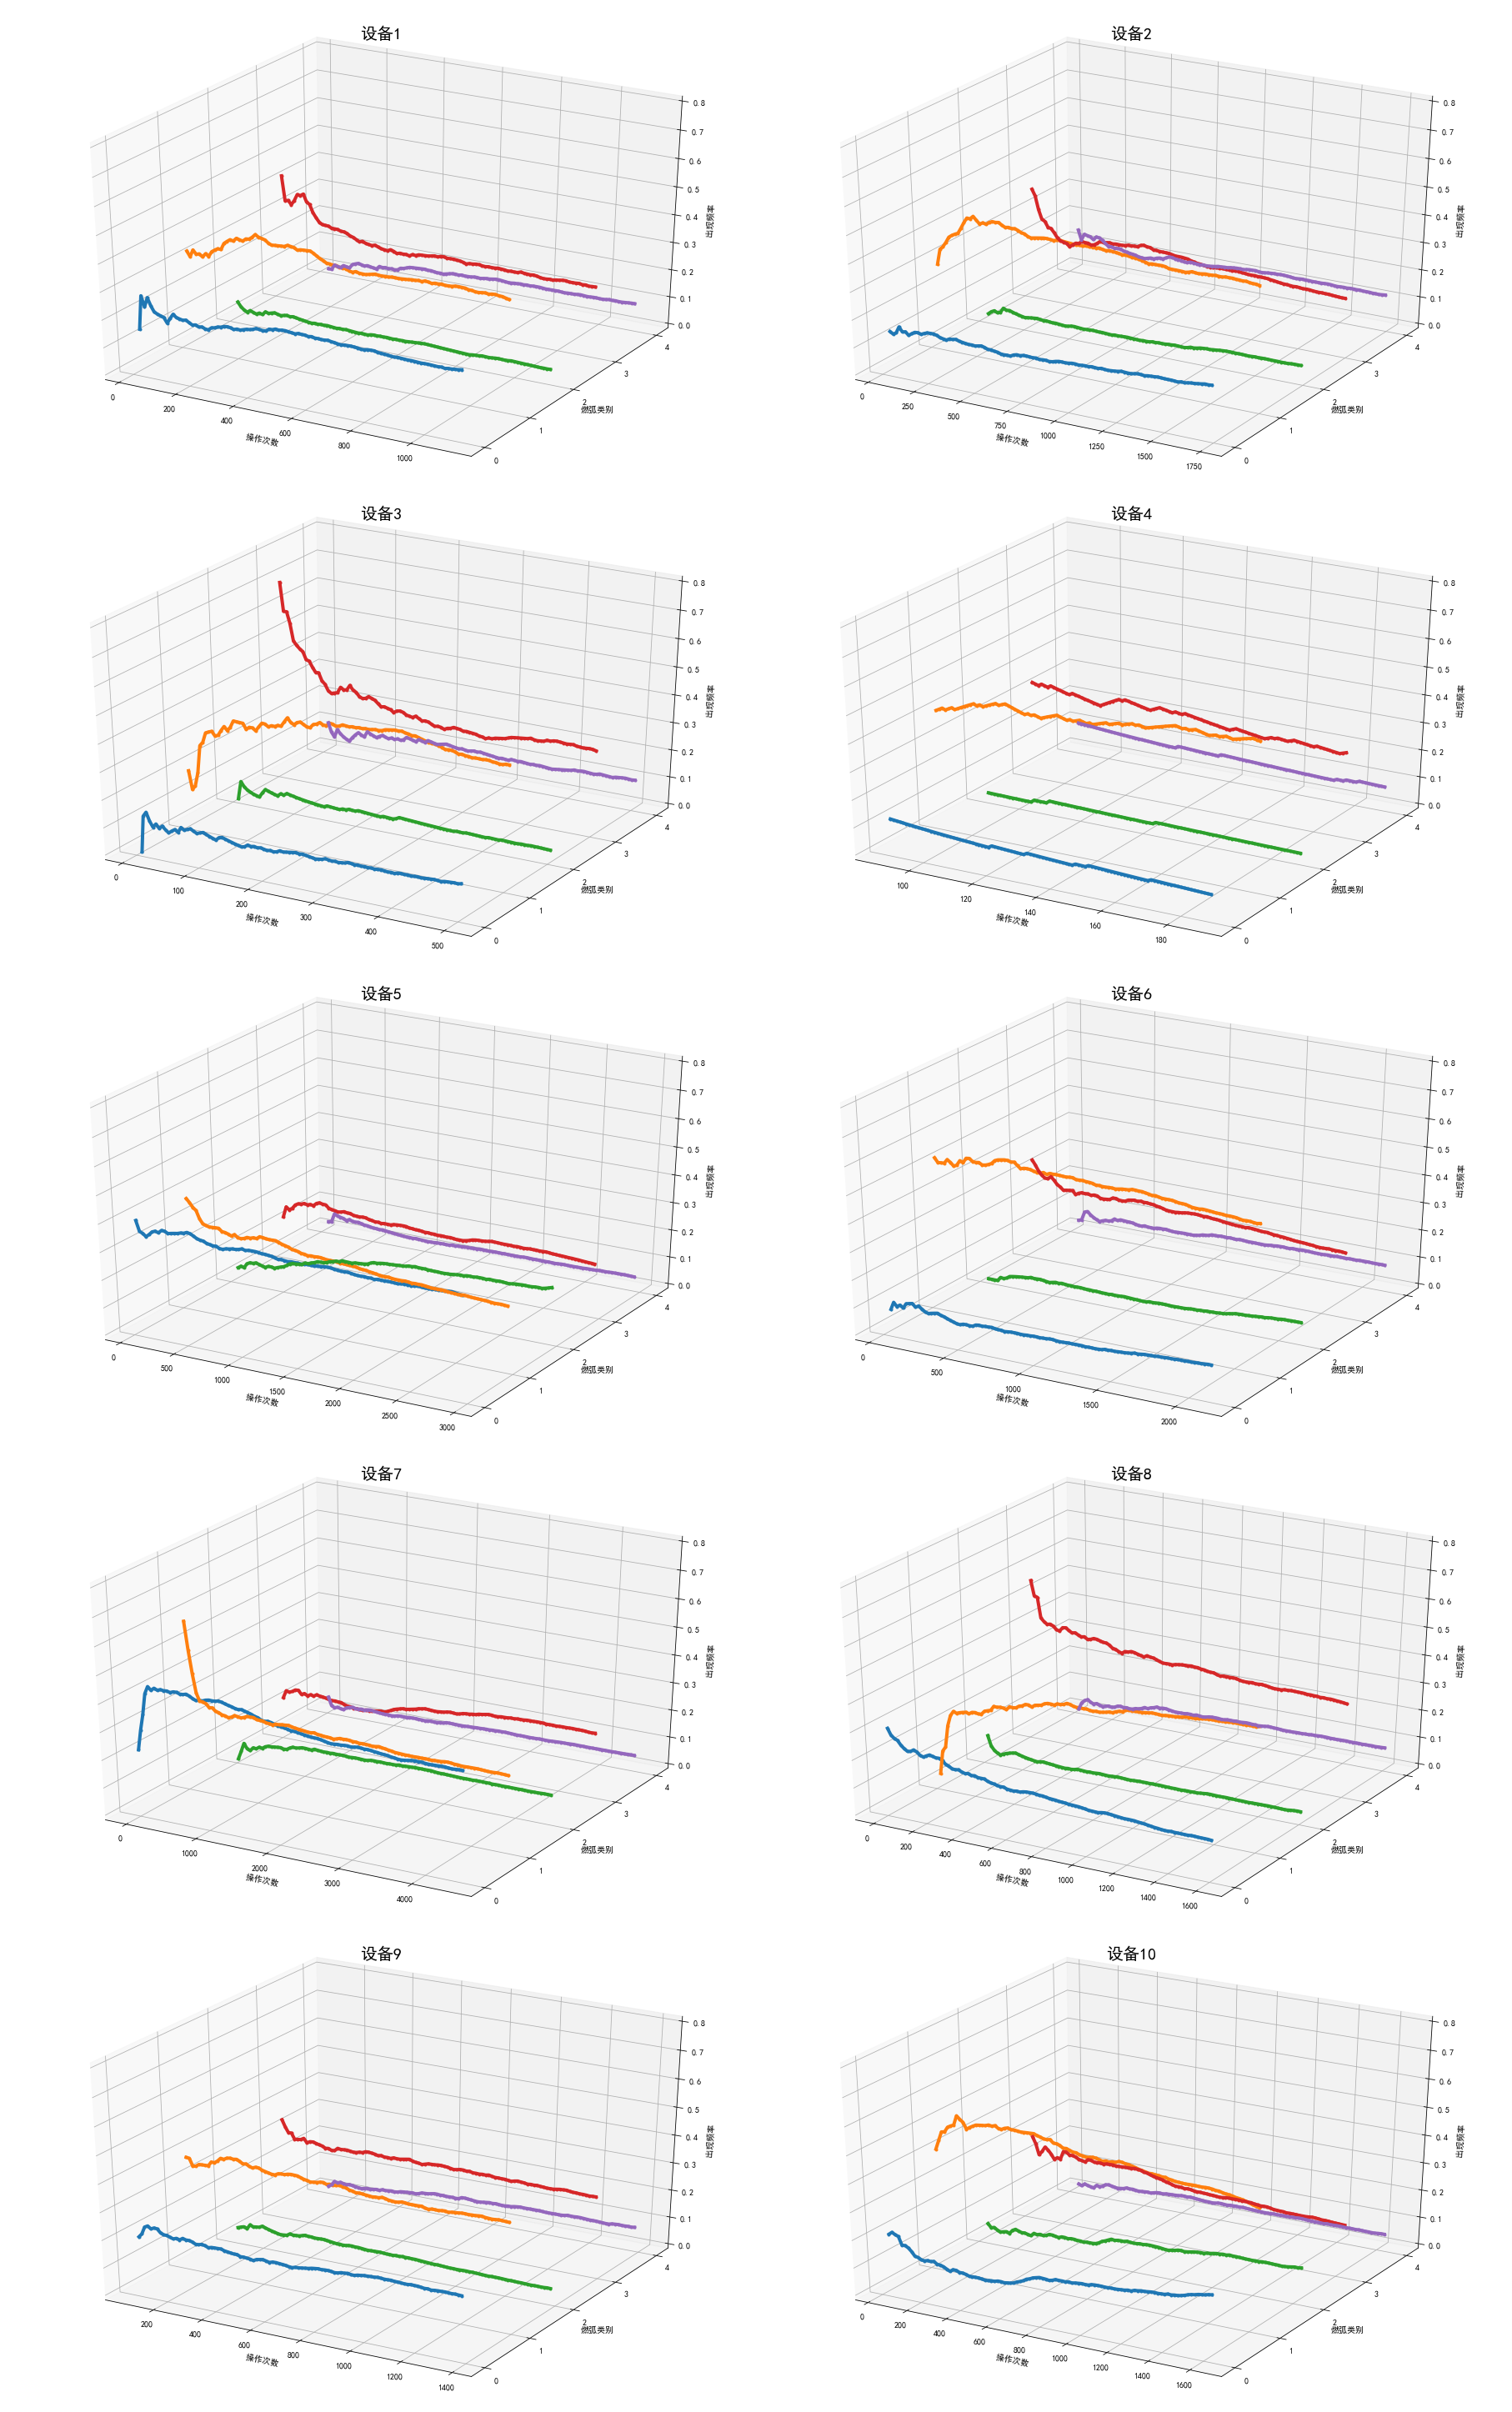

In [17]:
label_frequency_columns = [str(label) + '_frequency' for label in range(n_clusters)]
#label_frequency_columns = [str(label) + '_frequency' for label in [0,1,3]]
#frequency_df = pd.DataFrame(columns = label_frequency_columns + ['machine_id'])
sample_list = []
n_samples = 100
n_clusters = 5
fig = plt.figure(figsize= (25, 40))
#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.subplots_adjust(top=1,bottom=0,left=0,right=1,hspace=0,wspace=0)
for i in range(1, 11):
    ax = fig.add_subplot(5,2, i, projection='3d')
    machine_df = label_occ_count_df.groupby('machine_id').get_group(i).reset_index(drop = True)
    machine_df_len = len(machine_df)
    machine_range = np.arange(machine_df_len - int(machine_df_len/n_samples) * n_samples, machine_df_len, int(machine_df_len/n_samples))
    #print(i, machine_df_len,len(machine_range))
    #tmp_list = list(np.array(machine_df.loc[machine_range][label_frequency_columns]).T.flatten())
    #sample_list += [tmp_list]
    
    for z in range(n_clusters):
        xs = machine_range
        ys = machine_df.loc[xs][str(z) + '_frequency'].tolist()
        ax.plot(xs, ys, zs = z, zdir='y',marker = '.',linewidth = 4)
    ax.set_xlabel(u'操作次数    ')
    ax.set_ylabel(u'燃弧类别')
    ax.set_yticks(np.arange(n_clusters)) #设置刻度
    ax.set_zlabel(u'出现频率    ')
    ax.set_title('设备' + str(i), fontsize=20)
    ax.set_zlim([0, 0.8])
    #break
    #frequency_df = frequency_df.append(tmp_df)
plt.savefig('../fig/类别数'+str(n_clusters)+'分布采样.png',dpi = 100)
#sample_list
plt.show()

In [9]:
from sklearn.cluster import KMeans
n_clusters = 3
kmeans = KMeans(n_clusters = n_clusters, n_init = 10, random_state = 1)
kmeans.fit(sample_list)
print(list(np.arange(1, 11)))
print(list(kmeans.labels_))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[2, 0, 2, 0, 1, 0, 1, 2, 2, 0]


In [21]:
sample_df = pd.DataFrame(sample_list)
sample_df

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.156250,0.279070,0.240741,0.276923,0.250000,0.229885,0.224490,0.220183,0.216667,0.198473,...,0.081213,0.083253,0.082375,0.083412,0.082552,0.082637,0.083640,0.084622,0.085586,0.085638
1,0.148148,0.140845,0.147727,0.171429,0.155738,0.158273,0.147436,0.156069,0.163158,0.164251,...,0.118056,0.118676,0.117429,0.117431,0.117433,0.116237,0.116251,0.115678,0.116860,0.118020
2,0.000000,0.133333,0.150000,0.120000,0.100000,0.114286,0.100000,0.111111,0.100000,0.090909,...,0.095652,0.094624,0.093617,0.096842,0.097917,0.098969,0.100000,0.098990,0.098000,0.099010
3,0.120879,0.119565,0.118280,0.117021,0.115789,0.114583,0.113402,0.112245,0.111111,0.110000,...,0.071823,0.076923,0.076503,0.076087,0.075676,0.075269,0.074866,0.074468,0.074074,0.073684
4,0.402778,0.366337,0.361538,0.352201,0.361702,0.373272,0.378049,0.374545,0.384868,0.384384,...,0.036167,0.036518,0.037591,0.037559,0.037884,0.037849,0.038165,0.037782,0.037406,0.037037
5,0.083333,0.111111,0.098039,0.105691,0.097222,0.115152,0.118280,0.120773,0.109649,0.116466,...,0.079487,0.080670,0.080823,0.080974,0.081121,0.080292,0.080443,0.080591,0.080737,0.080411
6,0.227273,0.298507,0.357143,0.433121,0.460396,0.449393,0.458904,0.454006,0.458115,0.456674,...,0.041012,0.041049,0.041086,0.041360,0.041627,0.041890,0.041686,0.042398,0.042644,0.042662
7,0.304348,0.282051,0.272727,0.267606,0.252874,0.242718,0.235294,0.237037,0.245033,0.239521,...,0.069036,0.069642,0.068896,0.069490,0.069417,0.069994,0.069275,0.069841,0.070396,0.070940
8,0.202128,0.214953,0.241667,0.248120,0.239726,0.245283,0.244186,0.232432,0.227273,0.227488,...,0.067247,0.067345,0.070543,0.071374,0.072188,0.071482,0.071535,0.072325,0.071637,0.073135
9,0.211538,0.220588,0.214286,0.210000,0.181034,0.181818,0.175676,0.164634,0.150000,0.147959,...,0.044906,0.045756,0.045276,0.044805,0.044987,0.044529,0.044710,0.046135,0.046914,0.047066


In [22]:
from sklearn.manifold import TSNE

In [23]:
#用TSNE进行数据降维并展示聚类结果
tsne = TSNE(random_state = 0)
tsne.fit_transform(sample_df) #进行数据降维,并返回结果
X_tsne = pd.DataFrame(tsne.embedding_, index = sample_df.index) #转换数据格式, index = X_clustered['label']

In [24]:
X_tsne['label'] = kmeans.labels_

In [25]:
X_tsne

,0,1,label
0,32.420952,8.115230,2
1,0.648955,71.707100,0
2,71.019684,9.971006,3
3,3.785981,33.185135,0
4,-42.666500,-9.222070,1
5,-3.621689,-43.526516,0
6,-3.632402,-4.171708,1
7,-36.584400,35.804413,3
8,44.391380,50.615383,2
9,40.235809,-31.591665,0


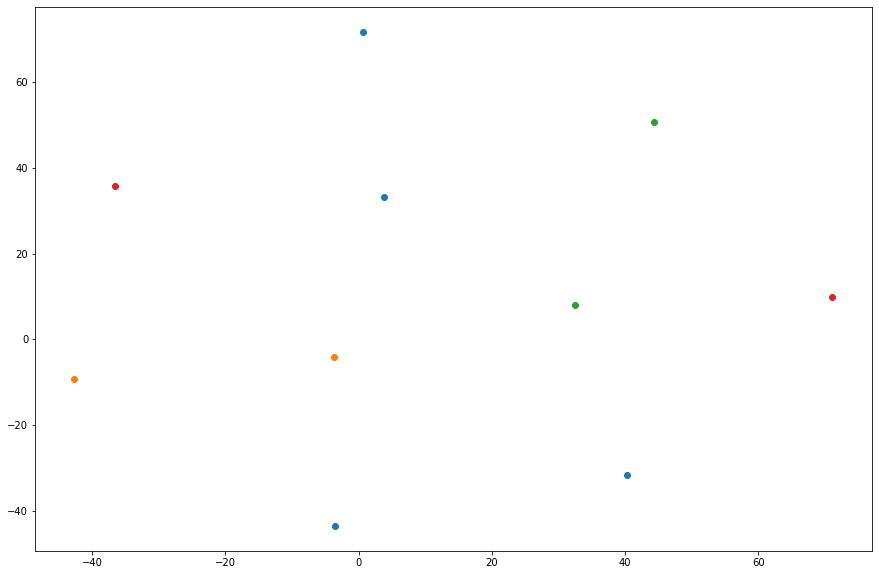

In [27]:
plt.figure(figsize=(15, 10))
for i in range(n_clusters):
    d = X_tsne[X_tsne['label'] == i]     #找出聚类类别为0的数据对应的降维结果
    #print(len(d))
    #print(d)
    plt.scatter(d[0], d[1])
d = X_tsne.tail(n_clusters)
#plt.scatter(d[0], d[1], c='red', s=150, marker='*')
plt.show()